<a href="https://colab.research.google.com/github/lrochaqu/nyu-python-public-policy/blob/master/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 5 Laura Rocha
Relationship between concentration of homeless shelters and count of 311 requests related to homeless services

Objective: The 311 Service Requests dataset includes a complaint type called "Homeless Person Assistance". 
Let's find out if there's a relationship between the number of homeless assistance 311 requests and the concentration of homeless shelter buildings per community district.


In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm 

In [80]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df = pd.read_csv ('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
shelter = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD', header='infer')

In [166]:
shelter.head(10)

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0
5,07/31/2018,Bronx,206,NaN,1.0,2.0,1.0,6.0,NaN,19.0
6,07/31/2018,Bronx,207,NaN,1.0,5.0,NaN,5.0,NaN,3.0
7,07/31/2018,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,07/31/2018,Bronx,209,NaN,NaN,1.0,NaN,6.0,NaN,2.0
9,07/31/2018,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [0]:
september = shelter[shelter ['Report Date'] == '09/30/2019']

In [168]:
september.head(10)

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [0]:
september = september.fillna(0)

In [0]:
september ['Total_Shelter'] = september['Adult Family Comm Hotel']+ september['Adult Family Shelter'] + september['Adult Shelter']+ september['Adult Shelter Comm Hotel']+ september['FWC Cluster']+ september['FWC Comm Hotel']+ september['FWC Shelter']

In [171]:
september.head(3)

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,Total_Shelter
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,23.0


In [0]:
Homeless = df[df ['complaint_type'] == 'Homeless Person Assistance']

In [173]:
Homeless.head(3)

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
46,46,46,39887175,08/01/2018 12:15:12 AM,08/01/2018 01:29:09 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10016,478 THIRD AVENUE,THIRD AVENUE,EAST 32 STREET,EAST 33 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:12 AM,The mobile outreach response team offered serv...,08/01/2018 01:29:09 AM,06 MANHATTAN,1.008880e+09,MANHATTAN,990113.0,210611.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744753,-73.978841,"(40.74475319239264, -73.97884116795397)",106.0
47,47,47,39883411,08/01/2018 12:15:39 AM,08/01/2018 01:33:51 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Residential Building/House,10035,445 EAST 120 STREET,EAST 120 STREET,1 AVENUE,PLEASANT AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:39 AM,The mobile outreach response team went to the ...,08/01/2018 01:33:51 AM,11 MANHATTAN,1.018080e+09,MANHATTAN,1003119.0,229980.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.797898,-73.931850,"(40.797897839118114, -73.93184977463629)",111.0


In [0]:
Homeless_cd = Homeless.groupby ('borocd').size().reset_index(name='Homeless Person Assistance')

In [175]:
Homeless_cd.head(3)

,borocd,Homeless Person Assistance
0,101.0,758
1,102.0,965
2,103.0,520


In [0]:
Homeless_data = pd.merge (left=Homeless_cd, right=september, left_on='borocd', right_on='Community District')

In [177]:
Homeless_data.fillna(0)

,borocd,Homeless Person Assistance,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,Total_Shelter
0,101.0,758,09/30/2019,Manhattan,101,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,103.0,520,09/30/2019,Manhattan,103,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
2,104.0,1055,09/30/2019,Manhattan,104,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
3,105.0,3020,09/30/2019,Manhattan,105,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
4,106.0,753,09/30/2019,Manhattan,106,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0
5,107.0,1684,09/30/2019,Manhattan,107,0.0,1.0,3.0,0.0,0.0,0.0,3.0,7.0
6,108.0,633,09/30/2019,Manhattan,108,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,109.0,303,09/30/2019,Manhattan,109,0.0,0.0,0.0,0.0,1.0,0.0,5.0,6.0
8,110.0,283,09/30/2019,Manhattan,110,0.0,1.0,10.0,0.0,1.0,0.0,11.0,23.0
9,111.0,373,09/30/2019,Manhattan,111,0.0,0.0,10.0,0.0,7.0,0.0,8.0,25.0


In [178]:
Homeless_data = Homeless_data [['borocd', 'Homeless Person Assistance','Total_Shelter']]
Homeless_data.head(10)

,borocd,Homeless Person Assistance,Total_Shelter
0,101.0,758,1.0
1,103.0,520,17.0
2,104.0,1055,8.0
3,105.0,3020,10.0
4,106.0,753,3.0
5,107.0,1684,7.0
6,108.0,633,1.0
7,109.0,303,6.0
8,110.0,283,23.0
9,111.0,373,25.0


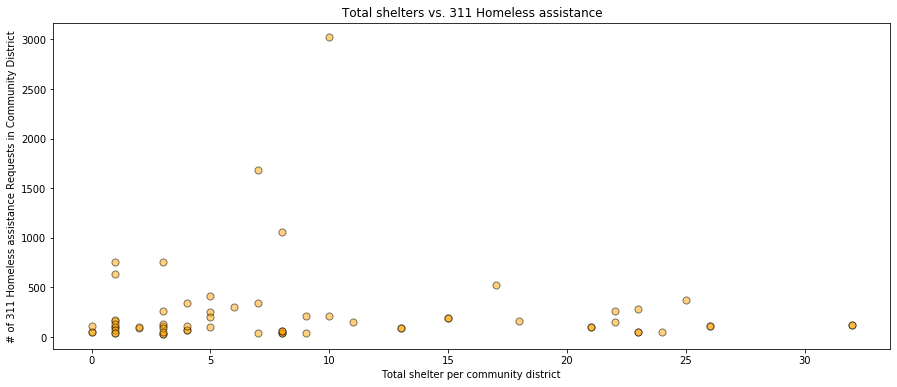

In [203]:
plt.figure(figsize= (15,6))
plt.scatter(
    np.array(Homeless_data['Total_Shelter']),  #X
    np.array(Homeless_data['Homeless Person Assistance']),
    s=50,
    c = 'orange',
    edgecolors= 'black',
    alpha=0.5)
plt.title('Total shelters vs. 311 Homeless assistance')
plt.xlabel('Total shelter per community district ')
plt.ylabel('# of 311 Homeless assistance Requests in Community District')

plt.show()


It doesn't looks like there is a correlation between the number of shelters and the requests for homeless assitance in a community district


In [204]:
x = np.array(Homeless_data['Total_Shelter'])
y = np.array(Homeless_data ['Homeless Person Assistance'])
np.corrcoef(x, y)

array([[ 1.        , -0.03119423],
       [-0.03119423,  1.        ]])

looks like a week negative correlation 

In [205]:
y = np.array(Homeless_data ['Homeless Person Assistance'])
x = np.array(Homeless_data['Total_Shelter'])
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

print (model.summary())



[[ 1.  1.]
 [ 1. 17.]
 [ 1.  8.]
 [ 1. 10.]
 [ 1.  3.]
 [ 1.  7.]
 [ 1.  1.]
 [ 1.  6.]
 [ 1. 23.]
 [ 1. 25.]
 [ 1.  3.]
 [ 1. 15.]
 [ 1. 15.]
 [ 1.  8.]
 [ 1.  8.]
 [ 1. 23.]
 [ 1. 23.]
 [ 1. 32.]
 [ 1. 32.]
 [ 1. 21.]
 [ 1. 21.]
 [ 1. 26.]
 [ 1. 26.]
 [ 1. 13.]
 [ 1. 13.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  8.]
 [ 1.  8.]
 [ 1.  3.]
 [ 1.  3.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  4.]
 [ 1.  4.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1. 22.]
 [ 1. 10.]
 [ 1. 18.]
 [ 1.  4.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. 24.]
 [ 1.  4.]
 [ 1.  3.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  3.]
 [ 1.  0.]
 [ 1.  3.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  7.]
 [ 1. 22.]
 [ 1.  9.]
 [ 1.  3.]
 [ 1.  1.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:      

In [207]:
p = model.params 
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [264.22165987  -1.54773083]
R2: 0.0009730796967145627


In [208]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = -1.55x + 264.22; R2 = 0.001


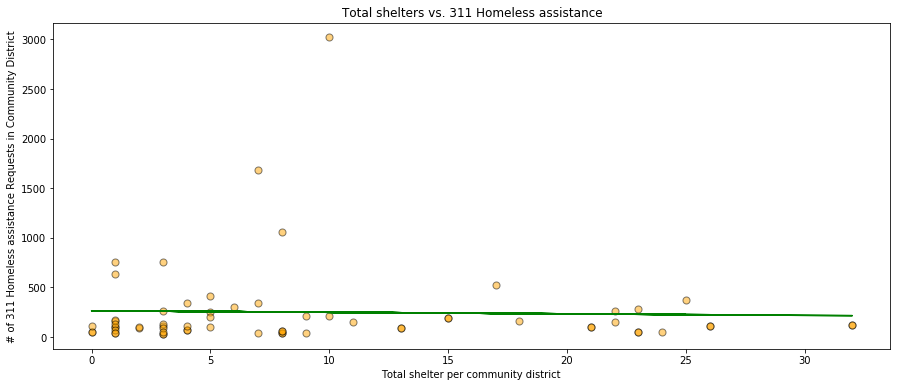

In [209]:
x_dummy = np.array(Homeless_data['Total_Shelter'])

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(Homeless_data['Total_Shelter']),  #X
    np.array(Homeless_data['Homeless Person Assistance']),
    s=50,
    c = 'orange',
    edgecolors= 'black',
    alpha=0.5)
plt.plot(
      x_dummy,
      p[0] + p[1] * x_dummy,
    c='green', 
    label=label)

plt.title('Total shelters vs. 311 Homeless assistance')
plt.xlabel('Total shelter per community district ')
plt.ylabel('# of 311 Homeless assistance Requests in Community District')

plt.show()


In [0]:
import seaborn as sns

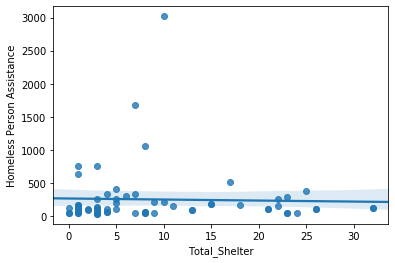

In [212]:
sns.regplot(
    x=Homeless_data['Total_Shelter'],
    y=Homeless_data['Homeless Person Assistance'])

There is a week negative correlation between the number of Homeless shelters and the 311 calls related to homeless. Community districts with the highest number of homeless shelters are not requiring Homeless person assistance. Maybe people in the community district know that there are shelters around so they don't call to require assistance.  